# Analysis of ATLAS-GAN results

Let's take a look at the results of the DCGAN trained to generate ATLAS RPV SUSY events.

In [1]:
from __future__ import print_function

import os

import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
results_dir = '/bigdata/shared/atlas_rpv/AtlasDCGAN_000'
#results_dir = '/global/cscratch1/sd/sfarrell/atlas_gan/AtlasDCGAN_001'

In [4]:
ls $results_dir

discriminator.torch   dis_outputs_real.npy  gen_samples.npy
dis_losses.npy        generator.torch       out.log
dis_outputs_fake.npy  gen_losses.npy        README


In [5]:
# Load the result arrays
dis_losses = np.load(os.path.join(results_dir, 'dis_losses.npy'))
gen_losses = np.load(os.path.join(results_dir, 'gen_losses.npy'))
dis_outputs_real = np.load(os.path.join(results_dir, 'dis_outputs_real.npy'))
dis_outputs_fake = np.load(os.path.join(results_dir, 'dis_outputs_fake.npy'))
gen_samples = np.load(os.path.join(results_dir, 'gen_samples.npy'))

<IPython.core.display.Javascript object>


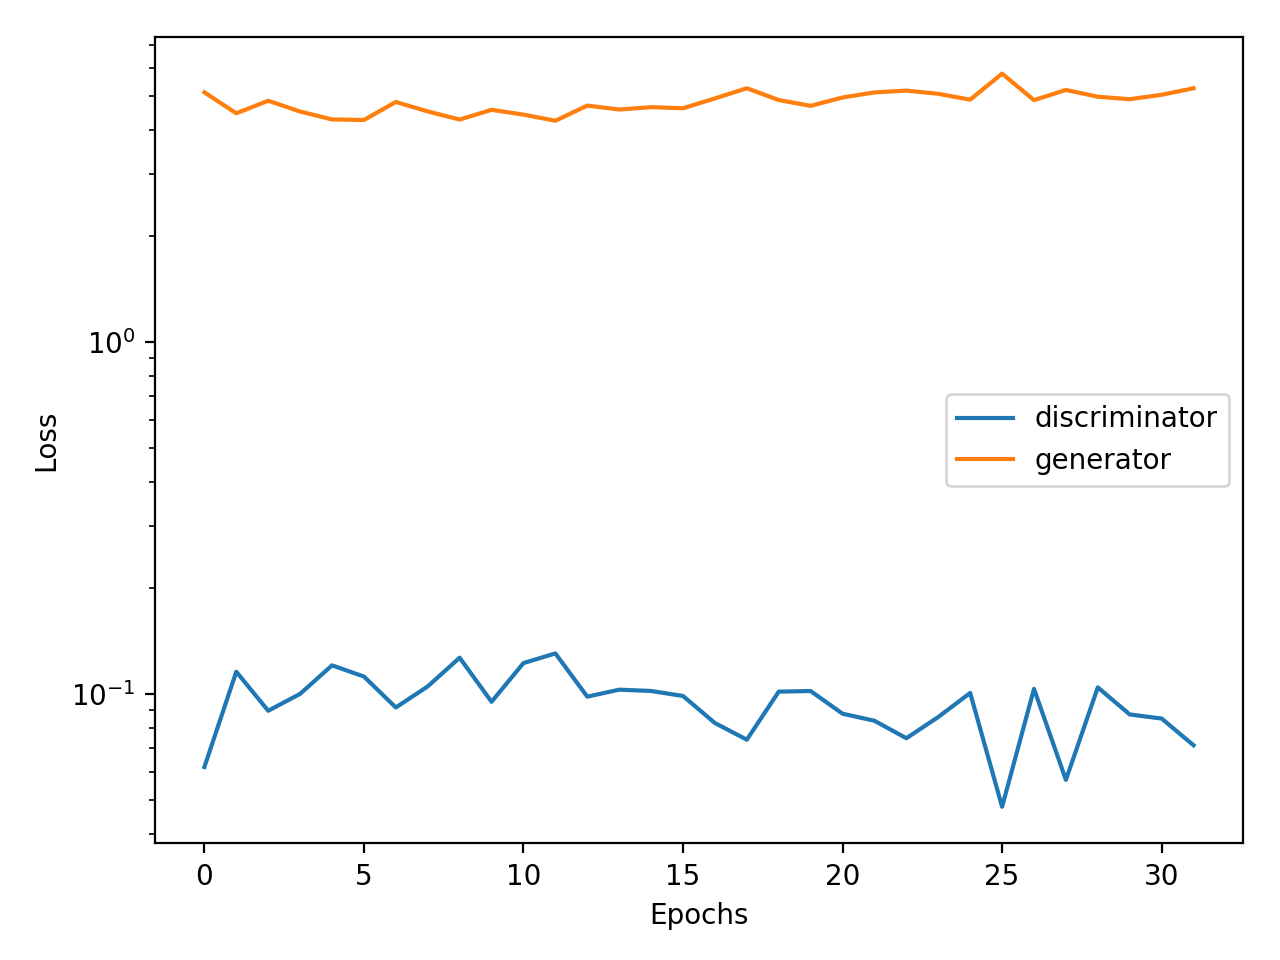

In [6]:
# Plot training loss
plt.figure()
plt.semilogy(dis_losses, label='discriminator')
plt.semilogy(gen_losses, label='generator')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.tight_layout()

<IPython.core.display.Javascript object>


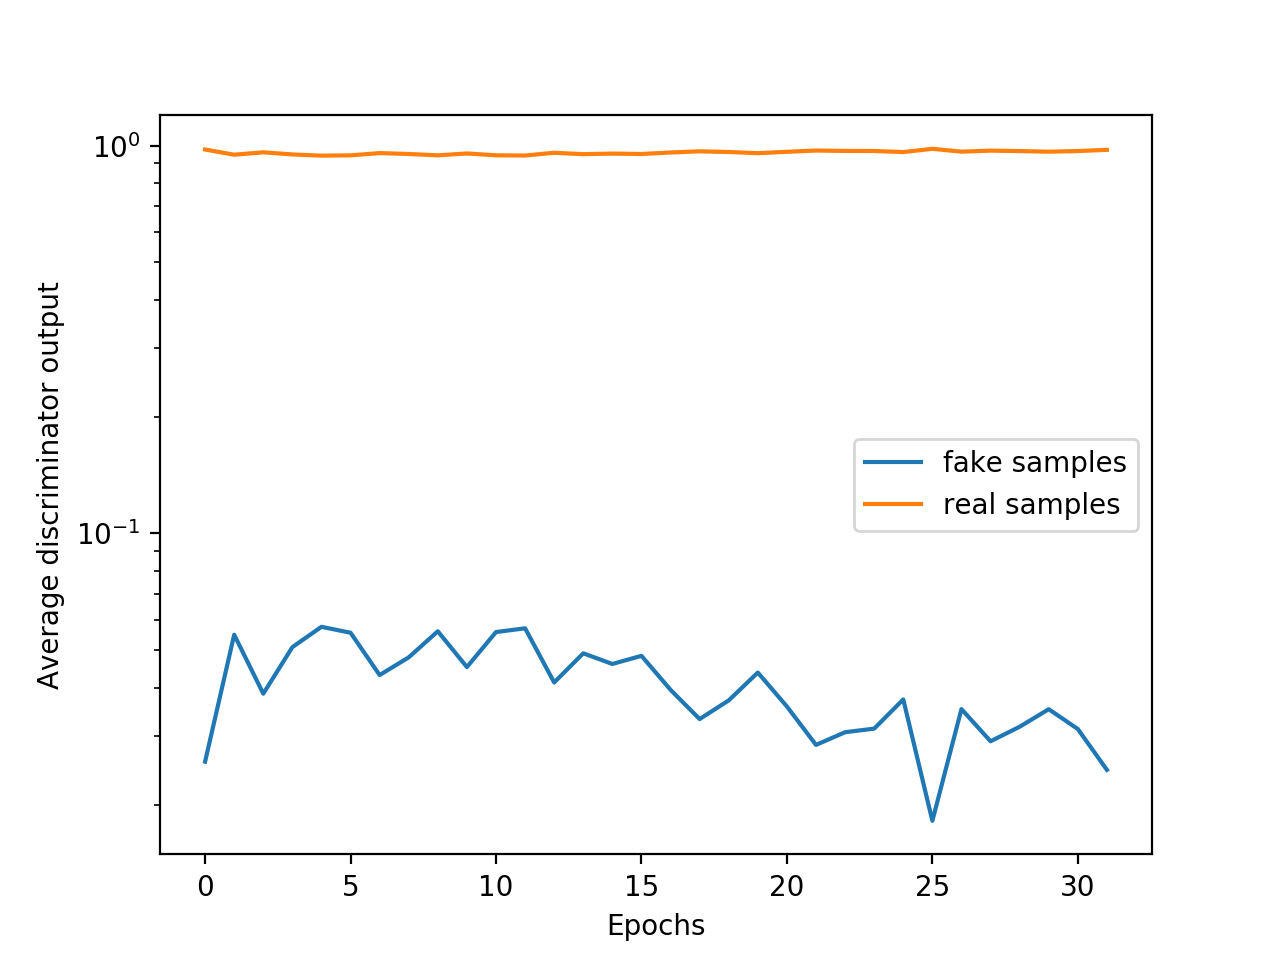

In [7]:
# Plot the discriminator average outputs per epoch
plt.figure()
plt.semilogy(dis_outputs_fake, label='fake samples')
plt.semilogy(dis_outputs_real, label='real samples')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Average discriminator output')

In [8]:
gen_samples.shape

(32, 8, 64, 64)

<IPython.core.display.Javascript object>


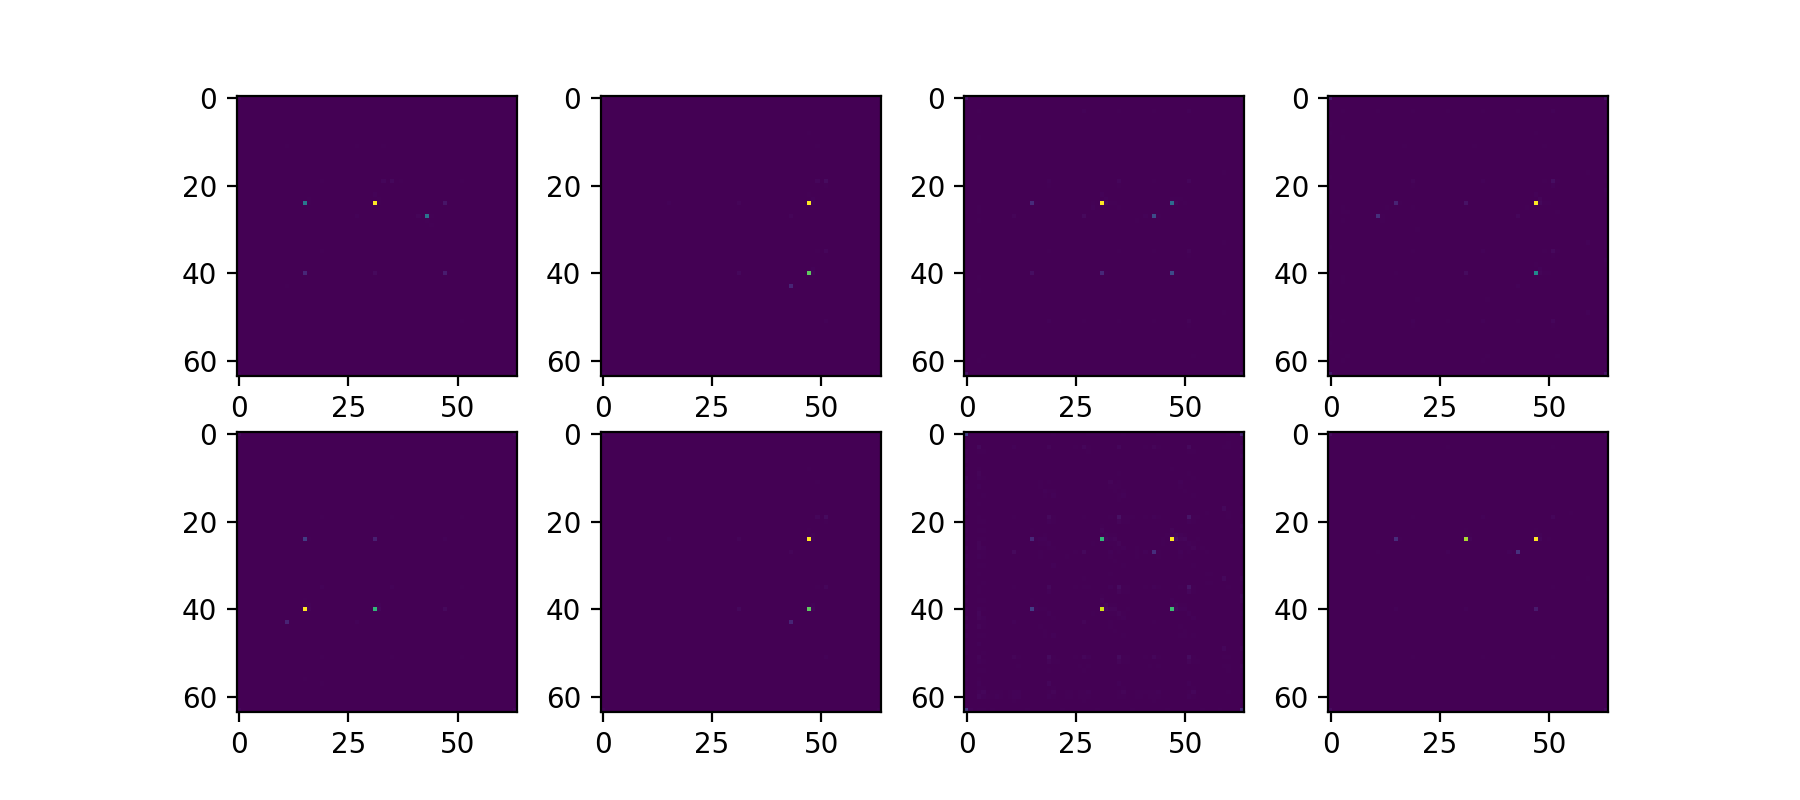

<IPython.core.display.Javascript object>


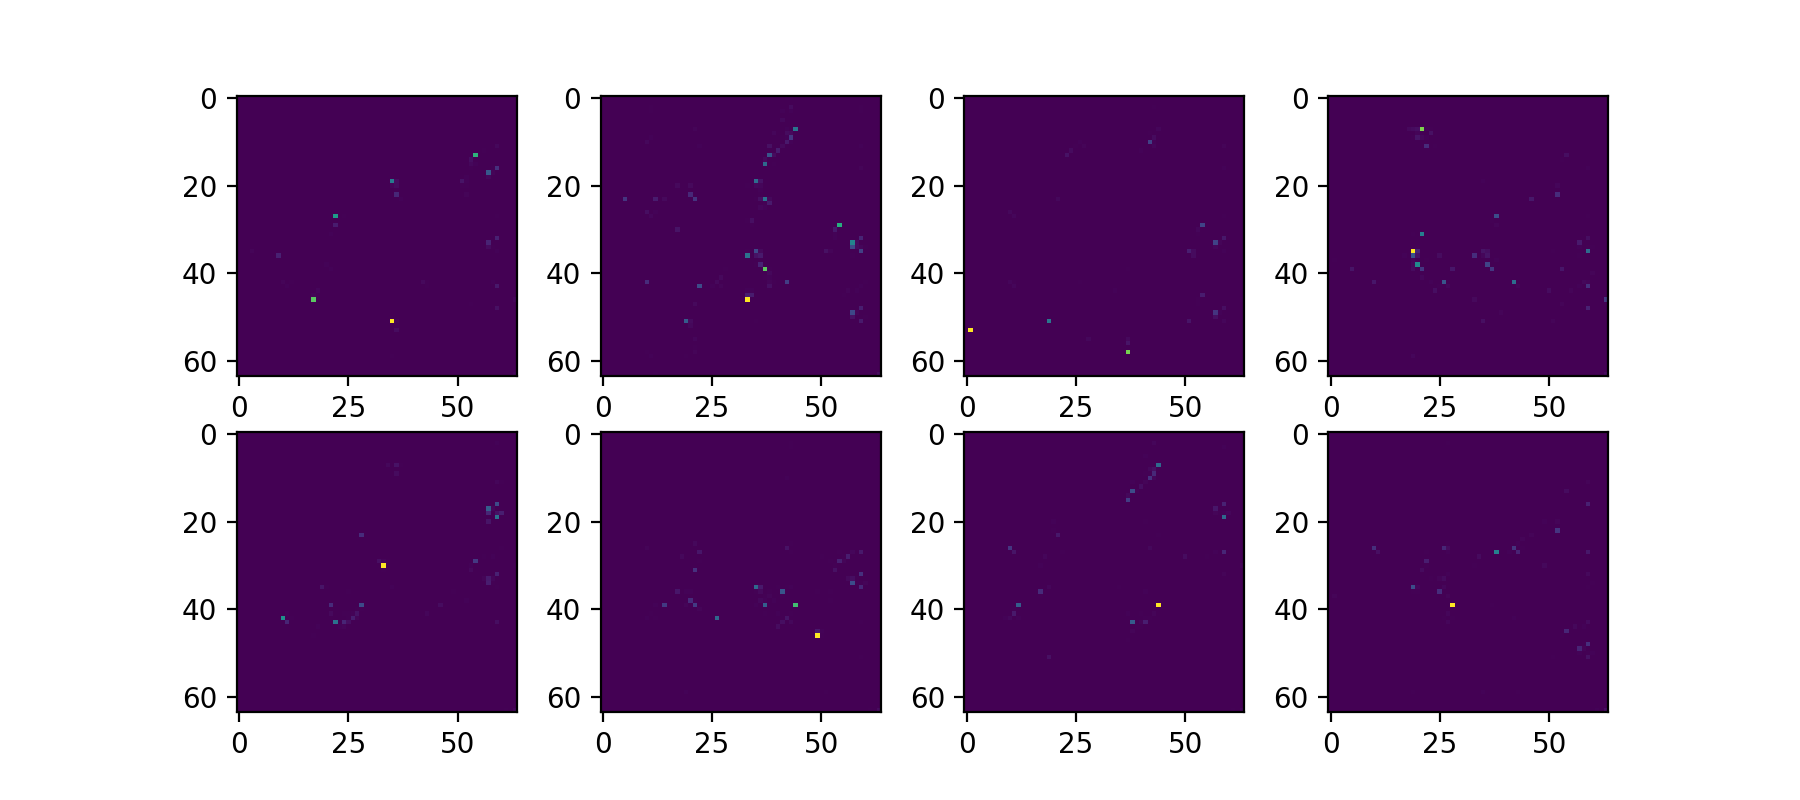

<IPython.core.display.Javascript object>


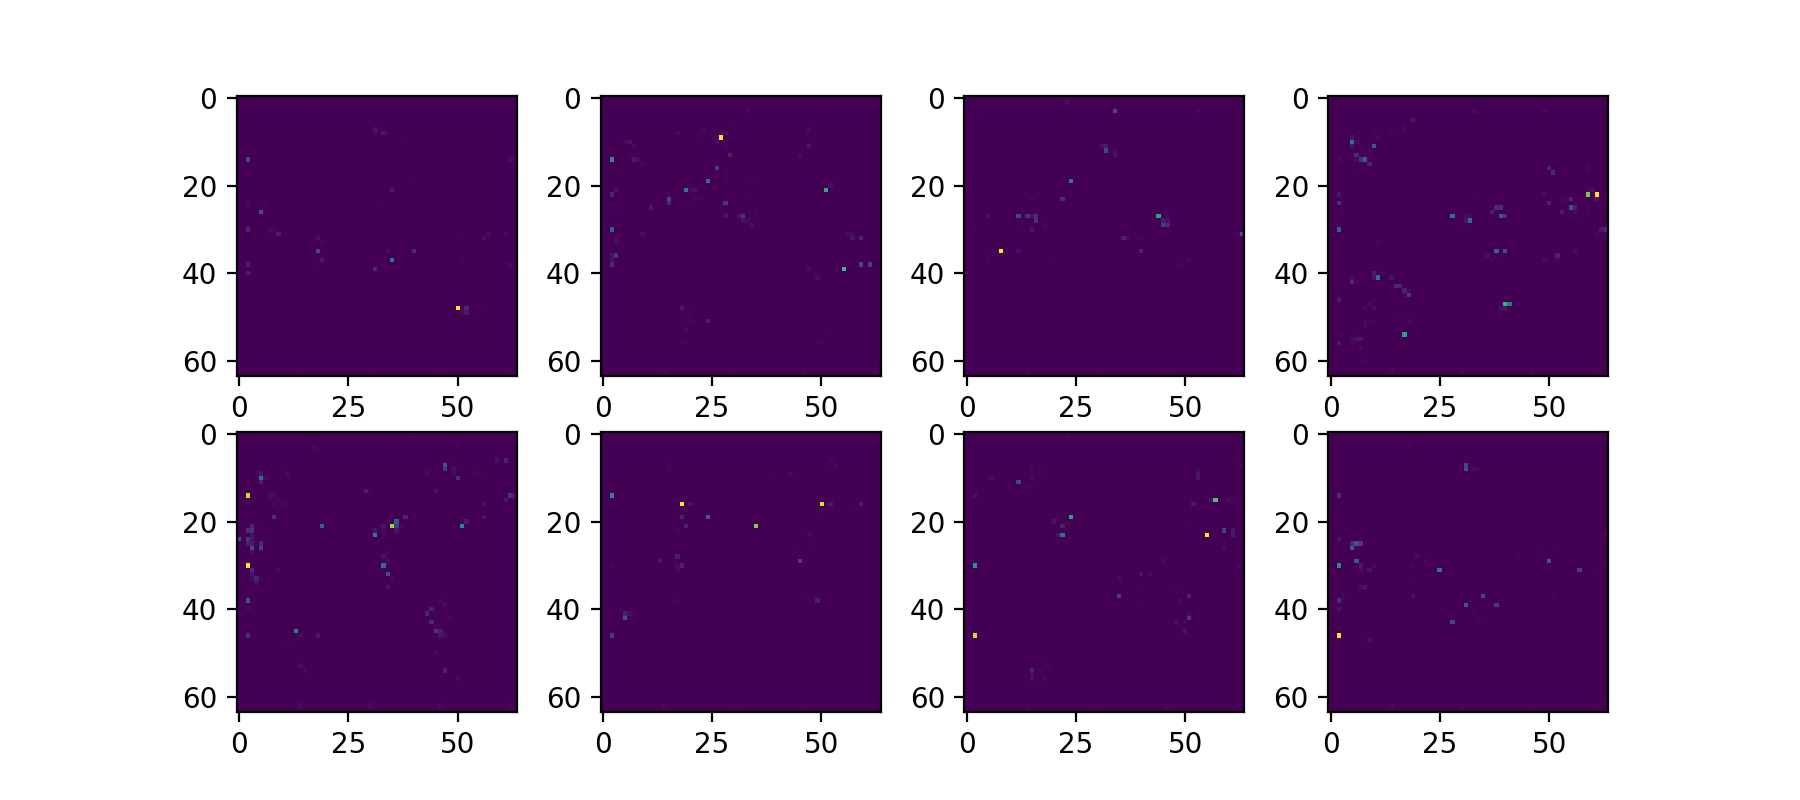

<IPython.core.display.Javascript object>


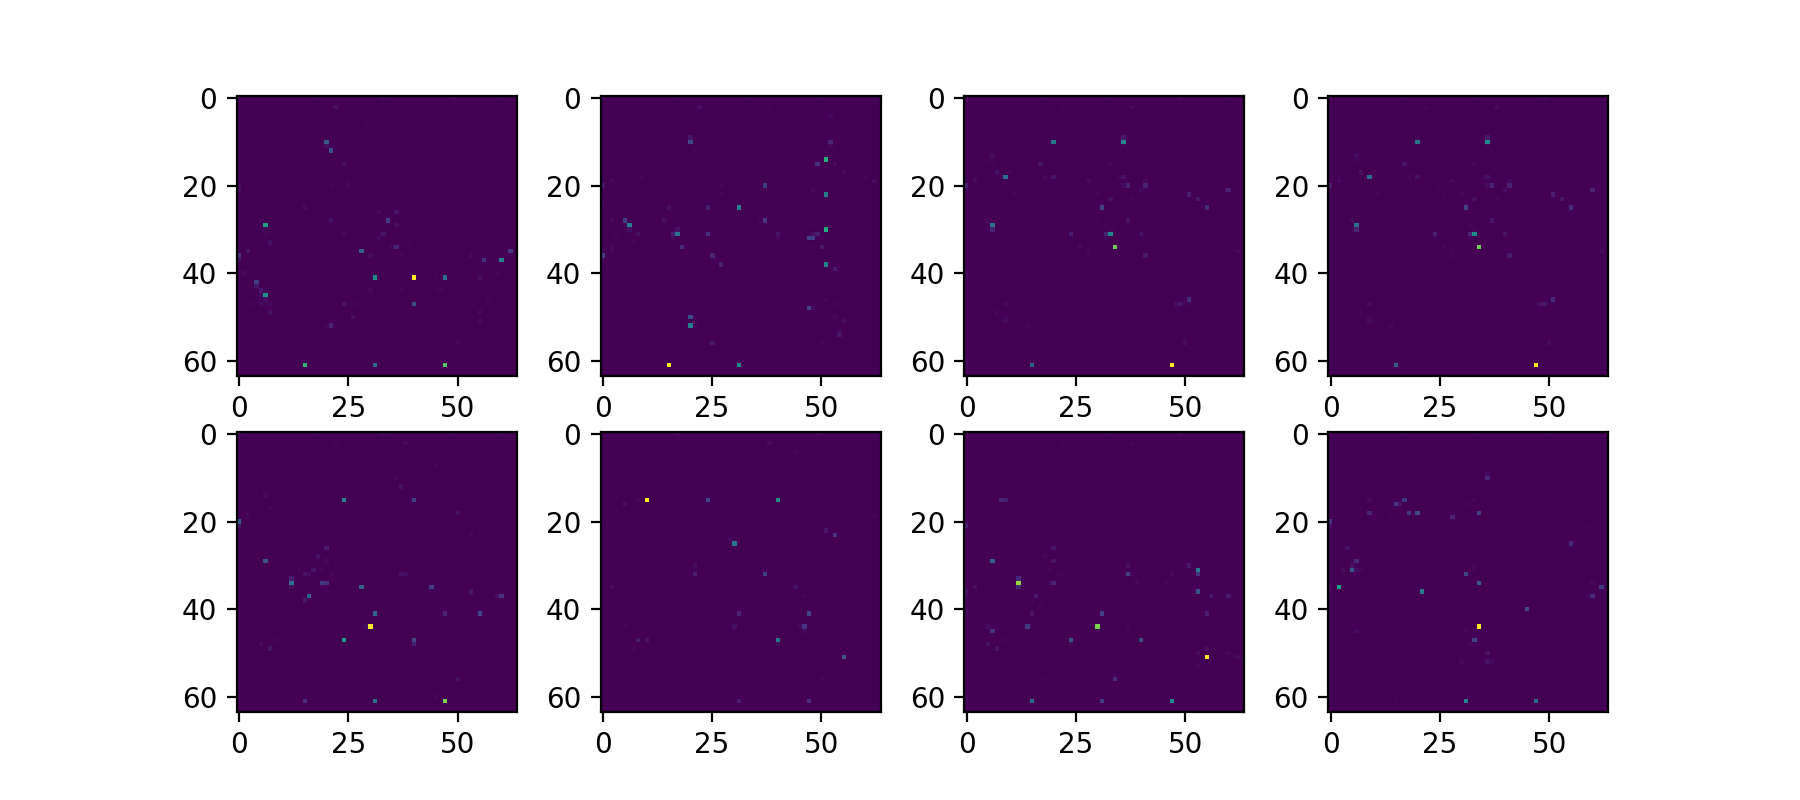

In [9]:
# Draw some samples from selected epochs
epochs = [0, 7, 15, 31]
for epoch in epochs:
    _, axs = plt.subplots(2, 4, figsize=(9,4))
    for i, ax in enumerate(axs.flatten()):
        ax.imshow(gen_samples[epoch, i])